In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
from datetime import datetime
import requests


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify thenearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm the sufficient count
len(cities)

643

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(url)
city_weather

<Response [400]>

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

# Create Counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | chazuta
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | gorkovskoye
City not found. Skipping...
Processing Record 7 of Set 1 | san isidro
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | sao jose da coroa grande
Processing Record 11 of Set 1 | naze
Processing Record 12 of Set 1 | prince rupert
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | meridian
Processing Record 15 of Set 1 | conselheiro pena
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | khandbari
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | bushehr
Processing Record 20 of Set 1 | meulaboh
Processing Record 21 of Set 1 |

Processing Record 32 of Set 4 | kaitangata
Processing Record 33 of Set 4 | roura
Processing Record 34 of Set 4 | sur
Processing Record 35 of Set 4 | pasni
Processing Record 36 of Set 4 | cidreira
Processing Record 37 of Set 4 | sao filipe
Processing Record 38 of Set 4 | samarkand
Processing Record 39 of Set 4 | rio gallegos
Processing Record 40 of Set 4 | nayoro
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | gari
Processing Record 43 of Set 4 | rocha
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | raudeberg
Processing Record 46 of Set 4 | gat
Processing Record 47 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | tahta
Processing Record 50 of Set 4 | murgab
Processing Record 1 of Set 5 | praia
Processing Record 2 of Set 5 | santiago de puringla
Processing Record 3 of Set 5 | coquimbo
Processing Record 4 of Set 5 | katima mulilo
Processing Record 5 of Set 5 | bichur

Processing Record 21 of Set 8 | meihekou
Processing Record 22 of Set 8 | grindavik
Processing Record 23 of Set 8 | zhangye
Processing Record 24 of Set 8 | komsomolskiy
Processing Record 25 of Set 8 | haicheng
Processing Record 26 of Set 8 | pelym
Processing Record 27 of Set 8 | igdir
Processing Record 28 of Set 8 | san lazaro
Processing Record 29 of Set 8 | dongsheng
Processing Record 30 of Set 8 | cabedelo
Processing Record 31 of Set 8 | chelno-vershiny
Processing Record 32 of Set 8 | dingle
Processing Record 33 of Set 8 | bargal
City not found. Skipping...
Processing Record 34 of Set 8 | coffeyville
Processing Record 35 of Set 8 | salinopolis
Processing Record 36 of Set 8 | tagusao
Processing Record 37 of Set 8 | malatya
Processing Record 38 of Set 8 | gornopravdinsk
Processing Record 39 of Set 8 | bossangoa
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | diamantino
Processing Record 42 of Set 8 | lakeway
Processing Record 43 of Set 8 | dubai
Processing Record 4

In [10]:
# Convert th array of dictionaries to a Pandas dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,30.20,69,0,4.47,RU,2021-04-18 22:24:31
1,Chazuta,-6.5742,-76.1367,89.60,55,40,3.44,PE,2021-04-18 22:24:31
2,Castro,-24.7911,-50.0119,59.92,92,66,5.44,BR,2021-04-18 22:24:32
3,Atuona,-9.8000,-139.0333,80.47,77,9,18.14,PF,2021-04-18 22:24:32
4,San Isidro,-12.1167,-77.0500,69.80,73,0,9.22,PE,2021-04-18 22:24:32
5,Ribeira Grande,38.5167,-28.7000,62.04,84,79,5.10,PT,2021-04-18 22:23:05
6,Rikitea,-23.1203,-134.9692,77.74,75,8,9.71,PF,2021-04-18 22:20:33
7,Sao Jose Da Coroa Grande,-8.8978,-35.1478,77.97,82,97,5.82,BR,2021-04-18 22:24:33
8,Naze,28.3667,129.4833,64.40,68,75,12.66,JP,2021-04-18 22:24:33
9,Prince Rupert,54.3161,-130.3201,69.80,24,1,11.50,CA,2021-04-18 22:14:49


In [17]:
# reorder columns in DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Natal,BR,2021-04-18 00:11:29,-5.7950,-35.2094,78.80,89,75,3.44
1,Hof,DE,2021-04-18 00:14:40,50.3167,11.9167,37.99,93,100,4.00
2,Port Alfred,ZA,2021-04-18 00:12:30,-33.5906,26.8910,65.28,60,34,12.50
3,Hluti,SZ,2021-04-18 00:14:41,-27.2167,31.6167,51.10,87,40,3.51
4,Khromtau,KZ,2021-04-18 00:14:41,50.2503,58.4347,48.22,76,29,8.90
5,Busselton,AU,2021-04-18 00:12:44,-33.6500,115.3333,62.28,69,0,7.07
6,Arinos,BR,2021-04-18 00:14:41,-15.9169,-46.1056,70.97,56,35,2.53
7,Hambantota,LK,2021-04-18 00:14:42,6.1241,81.1185,77.18,85,99,14.45
8,Ribeira Grande,PT,2021-04-18 00:08:03,38.5167,-28.7000,62.11,91,39,13.18
9,Rikitea,PF,2021-04-18 00:12:25,-23.1203,-134.9692,77.58,66,63,5.03


In [20]:
# Create the ouput file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")  #also changes index column to City_ID instead of blank

In [21]:
# Extract relevant fileds fromt he DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

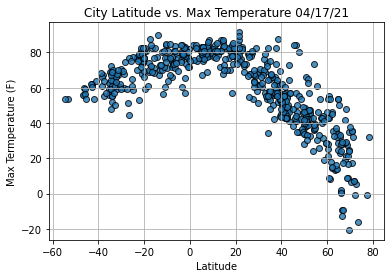

In [22]:
# Import time module
import time

# Build the scatter plot for latitude and max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Termperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

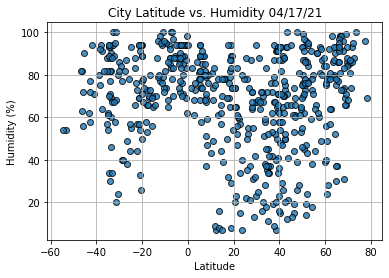

In [23]:
# Build the scatter plot for latitude and humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

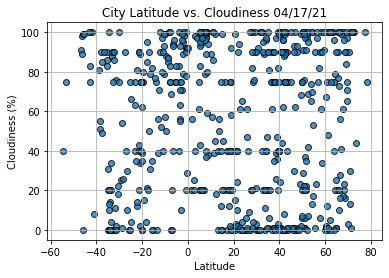

In [24]:
# Build the scatter plot for latitude and cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

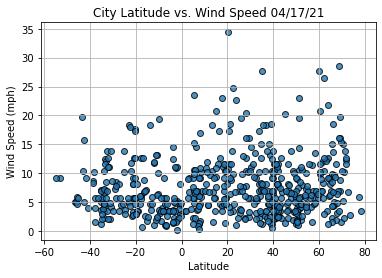

In [25]:
# Build the scatter plot for latitude and wind_speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data. 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values =  x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                  East London
Country                        ZA
Date          2021-04-18 00:12:32
Lat                      -33.0153
Lng                       27.9116
Max Temp                    64.04
Humidity                       67
Cloudiness                     88
Wind Speed                  12.08
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
561    False
562    False
563     True
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [29]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hof,DE,2021-04-18 00:14:40,50.3167,11.9167,37.99,93,100,4.00
4,Khromtau,KZ,2021-04-18 00:14:41,50.2503,58.4347,48.22,76,29,8.90
7,Hambantota,LK,2021-04-18 00:14:42,6.1241,81.1185,77.18,85,99,14.45
8,Ribeira Grande,PT,2021-04-18 00:08:03,38.5167,-28.7000,62.11,91,39,13.18
16,Doha,QA,2021-04-18 00:12:11,25.2867,51.5333,78.80,22,0,6.91


In [30]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Natal,BR,2021-04-18 00:11:29,-5.7950,-35.2094,78.80,89,75,3.44
2,Port Alfred,ZA,2021-04-18 00:12:30,-33.5906,26.8910,65.28,60,34,12.50
3,Hluti,SZ,2021-04-18 00:14:41,-27.2167,31.6167,51.10,87,40,3.51
5,Busselton,AU,2021-04-18 00:12:44,-33.6500,115.3333,62.28,69,0,7.07
6,Arinos,BR,2021-04-18 00:14:41,-15.9169,-46.1056,70.97,56,35,2.53


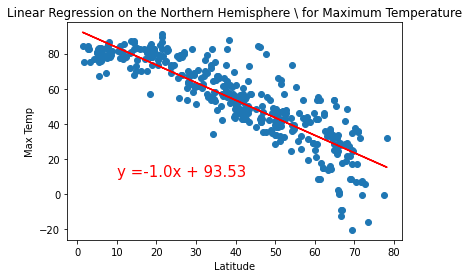

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (10,10))


In [32]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -1.0x + 93.53
The r-value is: -0.869


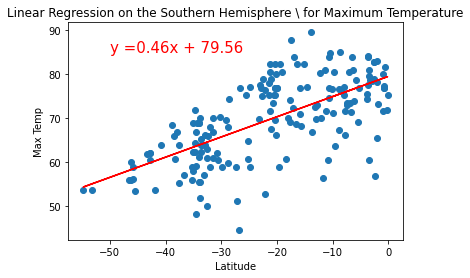

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,85))

In [34]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.46x + 79.56
The r-value is: 0.660


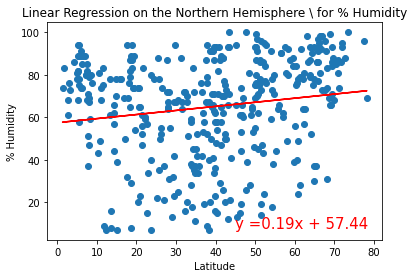

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity', (45,8))


In [36]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.19x + 57.44
The r-value is: 0.160


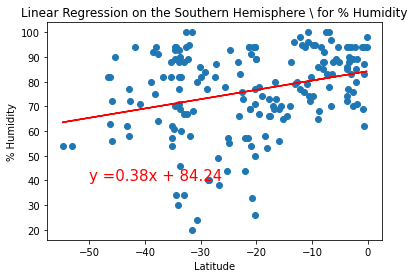

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,40))

In [38]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.38x + 84.24
The r-value is: 0.293


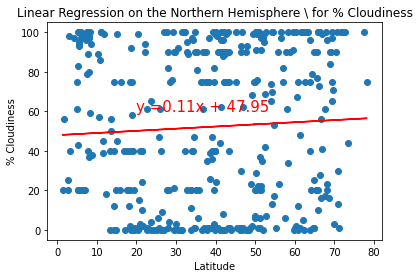

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness', (20,60))


In [40]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.11x + 47.95
The r-value is: 0.055


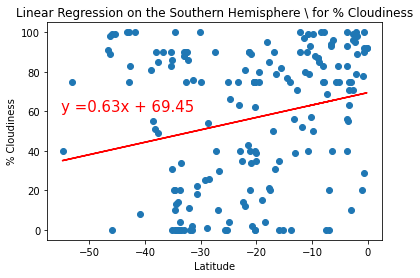

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-55,60))

In [42]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.63x + 69.45
The r-value is: 0.236


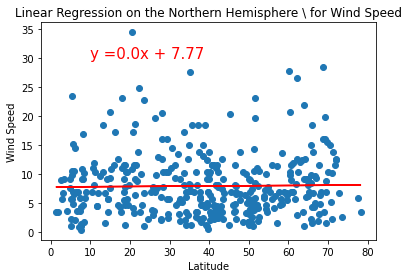

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed', (10,30))


In [44]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.0x + 7.77
The r-value is: 0.016


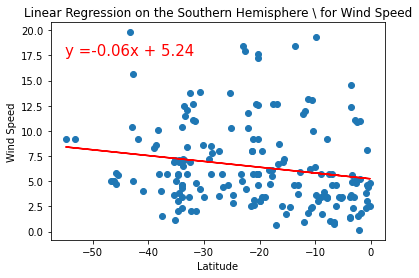

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-55,17.5))

In [46]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -0.06x + 5.24
The r-value is: -0.186
